# 실습

고객의 이탈 여부를 예측하기 위한 그래디언트 부스팅 분석을 실시하고 결과를 해석하라!

분석 절차: 
* [데이터 구성하기](#데이터-구성하기)
* [모델 생성](#모델-생성)
* [최종 모델 선정](#최종-모델-선정)
* [결론 도출](#결론-도출)


[Help](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


#### 패키지 불러오기

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#### 그래프 옵션 지정

In [2]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "AppleGothic") # 윈도우는 "Malgun Gothic"
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 구성하기

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("/Users/hooseonlee/Documents/포항공대/00_실습파일/2. Big Data 분석/통신고객이탈.csv" , engine = "python")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (930, 15)

변수 :  Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')


#### 결측치 처리

In [5]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

# 결측치 없음

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

#### 데이터 분리: 목표변수 vs. 설명변수

In [6]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis =1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display(df_raw_x.head())
display(df_raw_y.head())

df_raw_y = np.where(df_raw_y == "Active", 0, 1)

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


0    Active
1    Active
2    Active
3    Active
4    Active
Name: CHURN, dtype: object

#### 범주형 설명변수 더미 변환

In [7]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_x_dummy = pd.get_dummies(df_raw_x)
df_x_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


#### 데이터 분할

In [8]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
                df_x_dummy,df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (930, 13)
분할 후 설명변수 데이터 :Train (651, 33)   Test (279, 33)


In [9]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET', 'USAGE_BAND',
       'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME',
       'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO',
       'TOTAL_CALLS_TIME'],
      dtype='object')

변수 :  Index(['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M',
       'CHARGE_TYPE_CAT 100', 'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50',
       'CHARGE_TYPE_Play 100', 'CHARGE_TYPE_Play 300', 'HANDSET_ASAD170',
       'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30',
       'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10',
       'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low',
       'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow',
       'USAGE_BAND_None'],
      dtype='object')


## 모델 생성

### 기본 옵션 모델

In [10]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on train set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on train set: 0.971
Accuracy on test set: 0.885


In [11]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


#### @n_estimators: 트리의 개수 변경에 따른 모델 성능

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.879,0.892
1,20,0.916,0.900
2,30,0.931,0.914
3,40,0.935,0.914
4,50,0.943,0.900
5,60,0.951,0.896
6,70,0.952,0.892
7,80,0.957,0.889
8,90,0.963,0.889
9,100,0.971,0.885


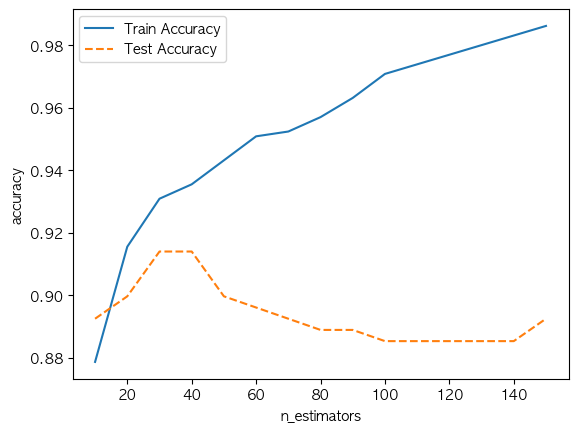

In [13]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

#### @learning_rate(학습률) 변화에 따른 모델 성능

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, n_estimators = 100, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

# LearningRate별 정확도 
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.971,0.885
1,0.2,0.998,0.885
2,0.3,1.000,0.892
3,0.4,1.000,0.860
4,0.5,1.000,0.878
5,0.6,1.000,0.882
6,0.7,1.000,0.871
7,0.8,1.000,0.885
8,0.9,1.000,0.849


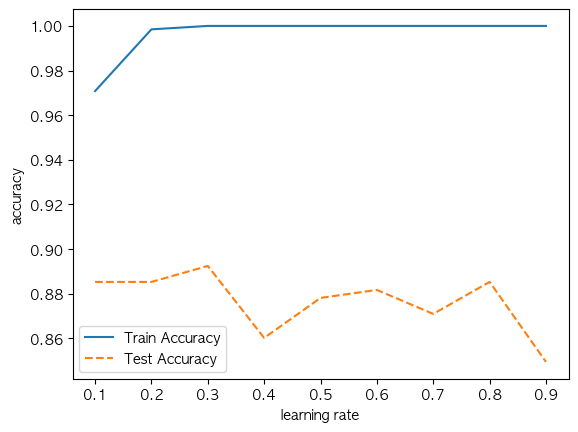

In [15]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

#### @max_depth: 최대 깊이 변경에 따른 모델 성능

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                                    n_estimators = 100, learning_rate = 0.3,random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# max_depth별 정확도 
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.916,0.914
1,2,0.982,0.875
2,3,1.000,0.889
3,4,1.000,0.871
4,5,1.000,0.882
5,6,1.000,0.882
6,7,1.000,0.885
7,8,1.000,0.885
8,9,1.000,0.896
9,10,1.000,0.889


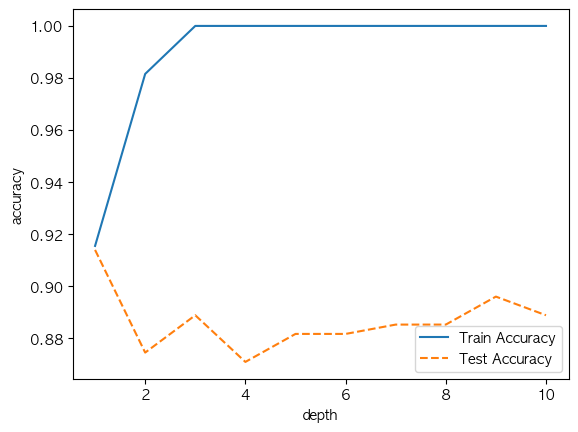

In [17]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

#### @min_samples_leaf: leaf 수 변경에 따른 모델 성능

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth = 6, n_estimators = 100, learning_rate = 0.3, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,1.000,0.892
1,20,1.000,0.889
2,30,1.000,0.864
3,40,1.000,0.860
4,50,1.000,0.828
5,60,1.000,0.828
6,70,0.997,0.867
7,80,0.972,0.799
8,90,0.937,0.814
9,100,0.916,0.814


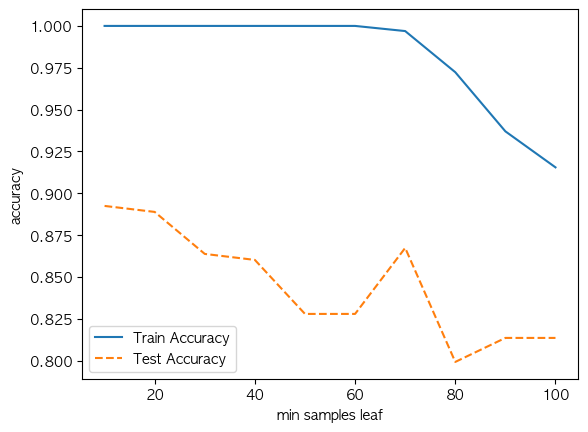

In [19]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

#### @min_samples_split: 분리 노드의 최소 샘플 수 변경에 따른 모델 성능

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, min_samples_leaf = 10,
                                    max_depth = 6,n_estimators = 100, learning_rate = 0.3, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,0.892
1,30,1.0,0.885
2,40,1.0,0.885
3,50,1.0,0.889
4,60,1.0,0.896
5,70,1.0,0.885
6,80,1.0,0.892
7,90,1.0,0.889
8,100,1.0,0.878


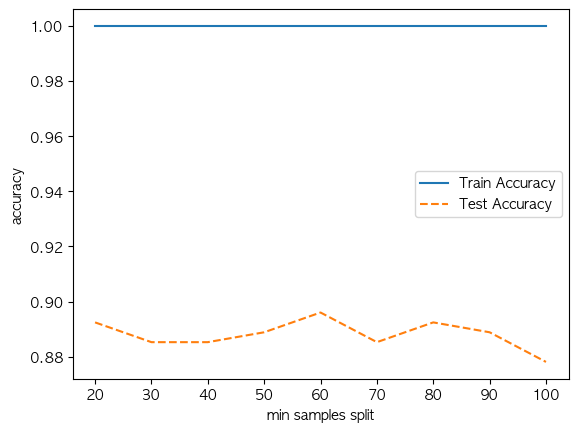

In [21]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

## 결론 도출

#### 최종 모델 선택

In [22]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth = 6, n_estimators = 100,
                                      learning_rate = 0.3, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.892

Confusion matrix: 
[[222  13]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.929     0.945     0.937       235
           1      0.675     0.614     0.643        44

    accuracy                          0.892       279
   macro avg      0.802     0.779     0.790       279
weighted avg      0.889     0.892     0.890       279



#### 설명변수 중요도

In [23]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.206
2,DROPPED_CALLS,0.143
20,HANDSET_CAS30,0.098
4,PEAK_CALLS_TIME,0.097
1,SERVICE_DURATION,0.084
8,TOTAL_CALLS_TIME,0.084
0,AGE,0.069
6,WEEKEND_CALLS_TIME,0.046
5,WEEKEND_CALLS_NO,0.033
22,HANDSET_S50,0.029


Text(0, 0.5, '설명변수')

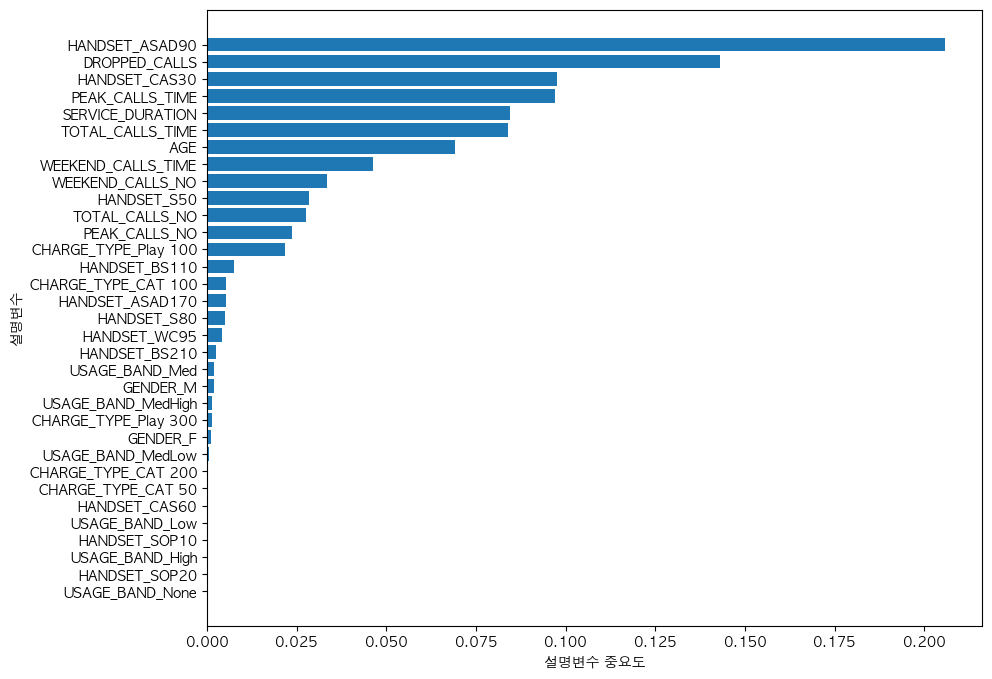

In [24]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

#### 참조:Grid Search

## @xgboost 실습

### @sklearn Framework 기반의 XGBoost 연습
특징 . 사이킷런의 기본 Estimator를 이용해 만들어 fit()과 predict()만으로 학습과 예측이 가능

. GridSearchCV,Pipeline 등 사이킷런의 유틸리티를 그대로 사용 가능 . 분류 : XGBClassifier / 회귀 : XGBRegressor

eta → learning_rate sub_sample → subsample lambda → reg_lambda alpha → reg_alpha num_boost_round → n_estimators

In [53]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [26]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [27]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[220  15]
 [ 16  28]] 

정확도: 0.8889
정밀도: 0.6512
재현율: 0.6364
F1    : 0.6437
AUC   : 0.7863


In [28]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[515   0]
 [  4 132]] 

정확도: 0.9939
정밀도: 1.0000
재현율: 0.9706
F1    : 0.9851
AUC   : 0.9853

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       515
           1       1.00      0.97      0.99       136

    accuracy                           0.99       651
   macro avg       1.00      0.99      0.99       651
weighted avg       0.99      0.99      0.99       651


 사용자 모델 평가 : Test 

오차행렬:
 [[225  10]
 [ 18  26]] 

정확도: 0.8996
정밀도: 0.7222
재현율: 0.5909
F1    : 0.6500
AUC   : 0.7742

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       235
           1       0.72      0.59      0.65        44

    accuracy                           0.90       279
   macro avg       0.82      0.77      0.80       279
weighted avg       0.89      0.90      0.90       279



In [29]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, 
                eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.63251
[1]	validation_0-logloss:0.58322
[2]	validation_0-logloss:0.54198
[3]	validation_0-logloss:0.50631
[4]	validation_0-logloss:0.47559
[5]	validation_0-logloss:0.44968
[6]	validation_0-logloss:0.42894
[7]	validation_0-logloss:0.40551
[8]	validation_0-logloss:0.38983
[9]	validation_0-logloss:0.37574
[10]	validation_0-logloss:0.36289
[11]	validation_0-logloss:0.35048
[12]	validation_0-logloss:0.34184
[13]	validation_0-logloss:0.33504
[14]	validation_0-logloss:0.32627
[15]	validation_0-logloss:0.31965
[16]	validation_0-logloss:0.31611
[17]	validation_0-logloss:0.31014
[18]	validation_0-logloss:0.30669
[19]	validation_0-logloss:0.30355
[20]	validation_0-logloss:0.29891
[21]	validation_0-logloss:0.29522
[22]	validation_0-logloss:0.29239
[23]	validation_0-logloss:0.28818
[24]	validation_0-logloss:0.28216
[25]	validation_0-logloss:0.27729
[26]	validation_0-logloss:0.27468
[27]	validation_0-logloss:0.27323
[28]	validation_0-logloss:0.27191
[29]	validation_0-loglos

/Users/hooseonlee/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/hooseonlee/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-logloss:0.26928
[86]	validation_0-logloss:0.27078
[87]	validation_0-logloss:0.27154
[88]	validation_0-logloss:0.27173
[89]	validation_0-logloss:0.27092
[90]	validation_0-logloss:0.27179
[91]	validation_0-logloss:0.27200
[92]	validation_0-logloss:0.27206
[93]	validation_0-logloss:0.27205
[94]	validation_0-logloss:0.27208
[95]	validation_0-logloss:0.27271
[96]	validation_0-logloss:0.27405
[97]	validation_0-logloss:0.27434
[98]	validation_0-logloss:0.27395
[99]	validation_0-logloss:0.27431
[100]	validation_0-logloss:0.27439
[101]	validation_0-logloss:0.27481
[102]	validation_0-logloss:0.27602
[103]	validation_0-logloss:0.27635
[104]	validation_0-logloss:0.27654
[105]	validation_0-logloss:0.27648
[106]	validation_0-logloss:0.27688
[107]	validation_0-logloss:0.27716
[108]	validation_0-logloss:0.27758
[109]	validation_0-logloss:0.27879
[110]	validation_0-logloss:0.27898
[111]	validation_0-logloss:0.27977
[112]	validation_0-logloss:0.27996
[113]	validation_0-logloss:0.27996


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [30]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 42
최적 성능(0-LogLoss): 0.25800551643000924


In [31]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[224  11]
 [ 18  26]] 

정확도: 0.8961
정밀도: 0.7027
재현율: 0.5909
F1    : 0.6420
AUC   : 0.7721

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       235
           1       0.70      0.59      0.64        44

    accuracy                           0.90       279
   macro avg       0.81      0.77      0.79       279
weighted avg       0.89      0.90      0.89       279



{'AGE': 253.0, 'SERVICE_DURATION': 297.0, 'DROPPED_CALLS': 149.0, 'PEAK_CALLS_NO': 188.0, 'PEAK_CALLS_TIME': 229.0, 'WEEKEND_CALLS_NO': 179.0, 'WEEKEND_CALLS_TIME': 237.0, 'TOTAL_CALLS_NO': 163.0, 'TOTAL_CALLS_TIME': 224.0, 'GENDER_F': 41.0, 'CHARGE_TYPE_CAT 100': 5.0, 'CHARGE_TYPE_CAT 200': 11.0, 'CHARGE_TYPE_Play 100': 29.0, 'CHARGE_TYPE_Play 300': 17.0, 'HANDSET_ASAD170': 24.0, 'HANDSET_ASAD90': 95.0, 'HANDSET_BS110': 45.0, 'HANDSET_BS210': 16.0, 'HANDSET_CAS30': 79.0, 'HANDSET_S50': 46.0, 'HANDSET_S80': 7.0, 'HANDSET_WC95': 24.0, 'USAGE_BAND_Med': 7.0, 'USAGE_BAND_MedHigh': 27.0, 'USAGE_BAND_MedLow': 6.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

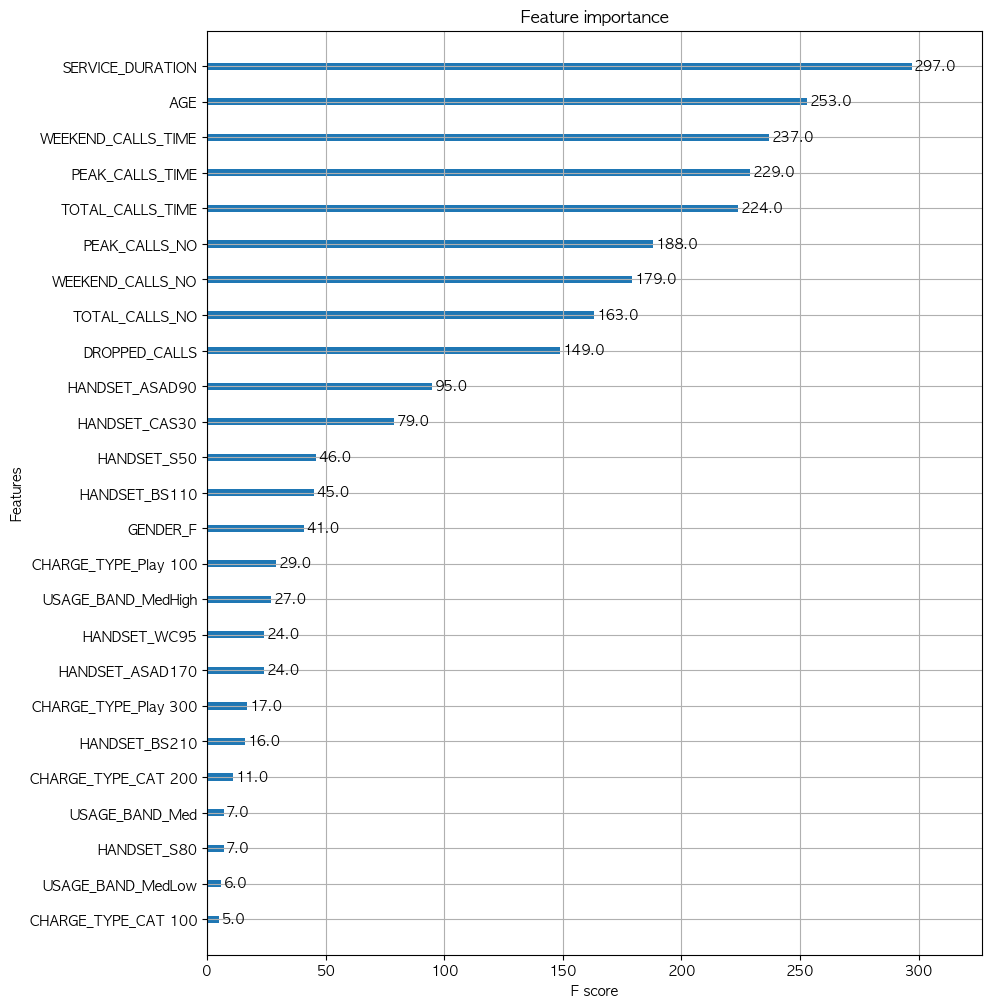

In [32]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_stop, ax=ax)

# importance_type 변경 가능
# plot_importance(xgb_stop, importance_type='gain', ax=ax)

# @LightGBM 실습

In [33]:
# package 설치
# !pip install lightgbm

In [34]:
# LightGBM 패키지 불러오기 
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [35]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [36]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[222  13]
 [ 16  28]] 

정확도: 0.8961
정밀도: 0.6829
재현율: 0.6364
F1    : 0.6588
AUC   : 0.7905


In [37]:
# 사용자 모델 생성
lgbm_user= LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
lgbm_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

# 예측 및 모델 평가:Test  
lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       136

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651


 사용자 모델 평가 : Test 

오차행렬:
 [[220  15]
 [ 16  28]] 

정확도: 0.8889
정밀도: 0.6512
재현율: 0.6364
F1    : 0.6437
AUC   : 0.7863

               precision    recall  f1-score   support

           0       0.93      0.94      0.93       235
           1       0.65      0.64      0.64        44

    accuracy                           0.89       279
   macro avg       0.79      0.79      0.79       279
weighted avg       0.89      0.89      0.89       279



In [38]:
# sklearn lightgbm 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state=1234)
# lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6,
#                           reg_alpha=0.2)

# 모델 성능 평가 데이터
lgbm_stop.fit(df_train_x, df_train_y, 
              # 조기 중단 파라미터
              early_stopping_rounds = 200, eval_metric="logloss", eval_set = eval_df, verbose=True)

[1]	valid_0's binary_logloss: 0.408606
[2]	valid_0's binary_logloss: 0.383786
[3]	valid_0's binary_logloss: 0.365006
[4]	valid_0's binary_logloss: 0.350162
[5]	valid_0's binary_logloss: 0.340059
[6]	valid_0's binary_logloss: 0.329908
[7]	valid_0's binary_logloss: 0.317581
[8]	valid_0's binary_logloss: 0.31095
[9]	valid_0's binary_logloss: 0.306121
[10]	valid_0's binary_logloss: 0.299665
[11]	valid_0's binary_logloss: 0.296399
[12]	valid_0's binary_logloss: 0.293549
[13]	valid_0's binary_logloss: 0.291391
[14]	valid_0's binary_logloss: 0.283541
[15]	valid_0's binary_logloss: 0.278398
[16]	valid_0's binary_logloss: 0.273562
[17]	valid_0's binary_logloss: 0.271503
[18]	valid_0's binary_logloss: 0.269755
[19]	valid_0's binary_logloss: 0.26741
[20]	valid_0's binary_logloss: 0.267971
[21]	valid_0's binary_logloss: 0.266232
[22]	valid_0's binary_logloss: 0.263537
[23]	valid_0's binary_logloss: 0.261961
[24]	valid_0's binary_logloss: 0.260545
[25]	valid_0's binary_logloss: 0.259705
[26]	valid_

/Users/hooseonlee/miniconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hooseonlee/miniconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[222]	valid_0's binary_logloss: 0.371586
[223]	valid_0's binary_logloss: 0.372705
[224]	valid_0's binary_logloss: 0.372778
[225]	valid_0's binary_logloss: 0.372846
[226]	valid_0's binary_logloss: 0.37258
[227]	valid_0's binary_logloss: 0.374834
[228]	valid_0's binary_logloss: 0.376633
[229]	valid_0's binary_logloss: 0.377174
[230]	valid_0's binary_logloss: 0.376154
[231]	valid_0's binary_logloss: 0.375935
[232]	valid_0's binary_logloss: 0.375479
[233]	valid_0's binary_logloss: 0.376926
[234]	valid_0's binary_logloss: 0.377959
[235]	valid_0's binary_logloss: 0.378564
[236]	valid_0's binary_logloss: 0.378599
[237]	valid_0's binary_logloss: 0.378912
[238]	valid_0's binary_logloss: 0.378684
[239]	valid_0's binary_logloss: 0.380719
[240]	valid_0's binary_logloss: 0.381985
[241]	valid_0's binary_logloss: 0.381668
[242]	valid_0's binary_logloss: 0.381451
[243]	valid_0's binary_logloss: 0.382483
[244]	valid_0's binary_logloss: 0.382567
[245]	valid_0's binary_logloss: 0.38363
[246]	valid_0's bi

LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)

In [39]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_)  

최적 횟수: 51
최적 성능(0-LogLoss): defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.25529353287146606)])})


In [40]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[224  11]
 [ 16  28]] 

정확도: 0.9032
정밀도: 0.7179
재현율: 0.6364
F1    : 0.6747
AUC   : 0.7948

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       235
           1       0.72      0.64      0.67        44

    accuracy                           0.90       279
   macro avg       0.83      0.79      0.81       279
weighted avg       0.90      0.90      0.90       279



['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M', 'CHARGE_TYPE_CAT_100', 'CHARGE_TYPE_CAT_200', 'CHARGE_TYPE_CAT_50', 'CHARGE_TYPE_Play_100', 'CHARGE_TYPE_Play_300', 'HANDSET_ASAD170', 'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow', 'USAGE_BAND_None']
[61 80 39 42 76 39 47 30 67  6  2  5  0  0  7  5 16 28  8  7 20  0  9 11
  0  0 16  0  0  5  2  3  0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

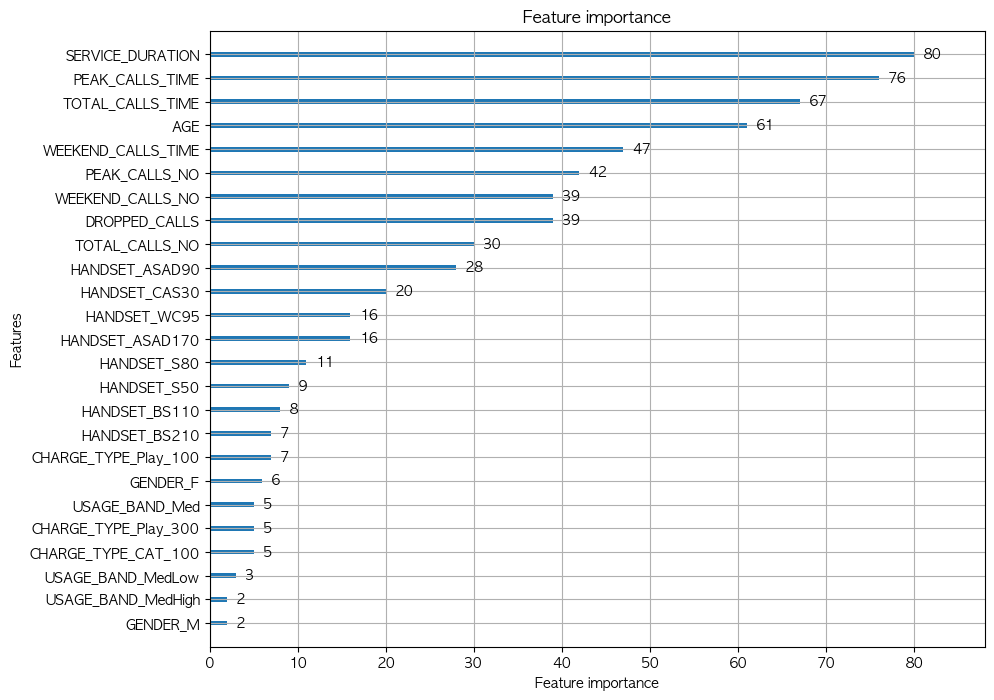

In [41]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

# @Categorical Boosting 실습

In [42]:
# package 설치
# !pip install catboost

In [43]:
# 패키지 불러오기 
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [44]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x166f9ee20>>

In [45]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.008577
0:	learn: 0.6873581	total: 60.5ms	remaining: 1m
1:	learn: 0.6806473	total: 61.3ms	remaining: 30.6s
2:	learn: 0.6739633	total: 62.2ms	remaining: 20.7s
3:	learn: 0.6670282	total: 63.1ms	remaining: 15.7s
4:	learn: 0.6618190	total: 63.9ms	remaining: 12.7s
5:	learn: 0.6562652	total: 64.6ms	remaining: 10.7s
6:	learn: 0.6513836	total: 65.5ms	remaining: 9.29s
7:	learn: 0.6455006	total: 66.3ms	remaining: 8.22s
8:	learn: 0.6400001	total: 67.2ms	remaining: 7.39s
9:	learn: 0.6352299	total: 68ms	remaining: 6.73s
10:	learn: 0.6301442	total: 68.7ms	remaining: 6.18s
11:	learn: 0.6256767	total: 69.6ms	remaining: 5.73s
12:	learn: 0.6203248	total: 70.4ms	remaining: 5.34s
13:	learn: 0.6143845	total: 71.3ms	remaining: 5.02s
14:	learn: 0.6090189	total: 72.3ms	remaining: 4.75s
15:	learn: 0.6043023	total: 73.5ms	remaining: 4.52s
16:	learn: 0.6000635	total: 74.8ms	remaining: 4.33s
17:	learn: 0.5959679	total: 75.9ms	remaining: 4.14s
18:	learn: 0.5916361	total: 77.5ms	remaining: 4s


In [46]:
# 사용자 모델 생성
cbc_user= CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))


# 예측 및 모델 평가:Test  
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.6297814	total: 1.53ms	remaining: 304ms
1:	learn: 0.5728847	total: 2.63ms	remaining: 261ms
2:	learn: 0.5228819	total: 3.58ms	remaining: 235ms
3:	learn: 0.4773259	total: 4.38ms	remaining: 214ms
4:	learn: 0.4524249	total: 5.22ms	remaining: 204ms
5:	learn: 0.4224168	total: 6.07ms	remaining: 196ms
6:	learn: 0.4058167	total: 7.08ms	remaining: 195ms
7:	learn: 0.3903294	total: 8.02ms	remaining: 193ms
8:	learn: 0.3702705	total: 8.9ms	remaining: 189ms
9:	learn: 0.3586852	total: 9.66ms	remaining: 184ms
10:	learn: 0.3481512	total: 10.5ms	remaining: 181ms
11:	learn: 0.3383228	total: 11.7ms	remaining: 183ms
12:	learn: 0.3279921	total: 12.7ms	remaining: 183ms
13:	learn: 0.3145170	total: 13.7ms	remaining: 182ms
14:	learn: 0.3055247	total: 14.7ms	remaining: 181ms
15:	learn: 0.3024559	total: 15.6ms	remaining: 180ms
16:	learn: 0.2939788	total: 16.8ms	remaining: 181ms
17:	learn: 0.2879716	total: 17.7ms	remaining: 179ms
18:	learn: 0.2788955	total: 18.6ms	remaining: 178ms
19:	learn: 0.2750039	to

In [47]:
# CatBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

cbc_stop = CatBoostClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)

cbc_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150,eval_set = eval_df, verbose=True)
# cbc_stop.fit(df_train_x, df_train_y, 
#             # 조기 중단 파라미터
#              early_stopping_rounds = 150, eval_metric="auto", eval_set = eval_df, 
#              verbose=True)

0:	learn: 0.6297814	test: 0.6304007	best: 0.6304007 (0)	total: 1.11ms	remaining: 334ms
1:	learn: 0.5728847	test: 0.5750094	best: 0.5750094 (1)	total: 2.24ms	remaining: 333ms
2:	learn: 0.5228819	test: 0.5245954	best: 0.5245954 (2)	total: 3.28ms	remaining: 324ms
3:	learn: 0.4773259	test: 0.4776287	best: 0.4776287 (3)	total: 4.87ms	remaining: 360ms
4:	learn: 0.4524249	test: 0.4523382	best: 0.4523382 (4)	total: 5.78ms	remaining: 341ms
5:	learn: 0.4224168	test: 0.4200115	best: 0.4200115 (5)	total: 6.78ms	remaining: 332ms
6:	learn: 0.4058167	test: 0.4034550	best: 0.4034550 (6)	total: 7.65ms	remaining: 320ms
7:	learn: 0.3903294	test: 0.3858054	best: 0.3858054 (7)	total: 8.56ms	remaining: 313ms
8:	learn: 0.3702705	test: 0.3661801	best: 0.3661801 (8)	total: 9.41ms	remaining: 304ms
9:	learn: 0.3586852	test: 0.3592346	best: 0.3592346 (9)	total: 10.6ms	remaining: 308ms
10:	learn: 0.3481512	test: 0.3494074	best: 0.3494074 (10)	total: 11.8ms	remaining: 309ms
11:	learn: 0.3383228	test: 0.3424544	best

In [48]:
# 최적모델 정보 확인
print("최적 횟수:",cbc_stop.best_iteration_)  
print("최적 성능:",cbc_stop.best_score_)

최적 횟수: 82
최적 성능: {'learn': {'Logloss': 0.021092864669381588}, 'validation': {'Logloss': 0.24890546223910756}}


In [49]:
# 조기 중단 예측 및 모델 평가:Test  
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[225  10]
 [ 17  27]] 

정확도: 0.9032
정밀도: 0.7297
재현율: 0.6136
F1    : 0.6667
AUC   : 0.7855

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       235
           1       0.73      0.61      0.67        44

    accuracy                           0.90       279
   macro avg       0.83      0.79      0.81       279
weighted avg       0.90      0.90      0.90       279



In [50]:
# 변수 중요도 확인 
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)
# print(cbc_stop.get_feature_importance())

['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M', 'CHARGE_TYPE_CAT 100', 'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50', 'CHARGE_TYPE_Play 100', 'CHARGE_TYPE_Play 300', 'HANDSET_ASAD170', 'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow', 'USAGE_BAND_None']
[ 7.46385727  6.95577004 10.82614814  5.19638826  7.46210448  3.10711584
  5.12788204  2.95572712  4.22733521  0.88985552  1.21399914  0.52629508
  0.90235785  0.42970024  2.51171414  1.97282145  3.83966271 12.69922845
  2.59222411  2.31336233  5.25719512  0.0268633   3.68521873  1.72349983
  0.15311184  0.11757895  3.41897542  0.          0.15699854  0.82429439
  0.56829926  0.83276732  0.0216

In [51]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_stop.feature_names_
df_cbc_importance ["Importance"] = cbc_stop.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3)

,Feature,Importance
17,HANDSET_ASAD90,12.699
2,DROPPED_CALLS,10.826
0,AGE,7.464
4,PEAK_CALLS_TIME,7.462
1,SERVICE_DURATION,6.956
20,HANDSET_CAS30,5.257
3,PEAK_CALLS_NO,5.196
6,WEEKEND_CALLS_TIME,5.128
8,TOTAL_CALLS_TIME,4.227
16,HANDSET_ASAD170,3.840


Text(0, 0.5, '설명변수')

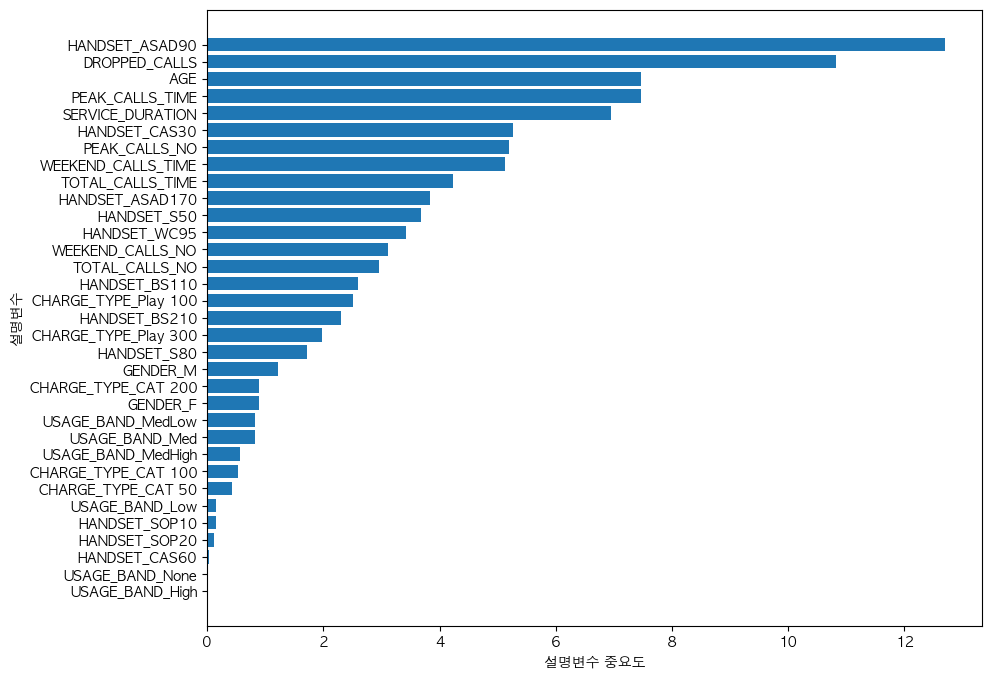

In [52]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# End of Boosting